In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]='0'

os.environ["HF_HOME"]="~/codes/.cache/huggingface"

In [2]:
import torch
import random
import numpy as np

def set_seeds(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
set_seeds(42)

In [3]:
import matplotlib.pyplot as plt
def show_images(images, scores, test_artist, train_artists):
    n: int = len(images)
    f = plt.figure(figsize=(16, 2))
    for i in range(n):
        # Debug, plot figure
        ax = f.add_subplot(1, n, i + 1)
        if i==0:
            pass
            ax.title.set_text(test_artist)
        else:
            ax.title.set_text(str(np.round(scores[i-1], 4))+'\n'+train_artists[i-1])
            ax.axis('off')
        if images[i]==None:
            pass
        else:
            plt.imshow(images[i])

    plt.show(block=True)

In [4]:
from datasets import load_dataset

In [6]:
import pickle

In [7]:
with open('../../data/indices/5000-0.5/idx-train.pkl', 'rb')  as handle:
    idx_train = pickle.load(handle)
len(idx_train)   

5000

In [8]:
# with open('./data/indices/1000-0.5/idx-val.pkl', 'rb')  as handle:
#     idx_val = pickle.load(handle)
# len(idx_val)

In [1]:
from datasets import load_dataset

dataset = load_dataset(
    'cifar10',
    # args.dataset_config_name,
    # cache_dir=args.cache_dir,
    # split="train",
)

NameError: name 'load_dataset' is not defined

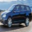

In [10]:
from datasets import DatasetDict, Dataset, load_dataset, Image

train_dataset = dataset['train'].select(idx_train)
train_dataset[0]["img"]

In [11]:
import pandas as pd
df = pd.DataFrame()
df['path'] = ['{}/{}.png'.format('../../saved/5000-0.5/gen', i) for i in range(1000)]

from datasets import DatasetDict, Dataset, load_dataset, Image
dataset = DatasetDict({
"train": Dataset.from_dict({
    "img": df['path'].tolist(),
}).cast_column("img", Image()),})
val_dataset = dataset["train"]

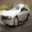

In [12]:
val_dataset[0]['img']

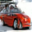

In [13]:
val_dataset[1]['img']

In [14]:
# val_dataset =  dataset['test'].select(idx_val)
# val_dataset[0]["img"]

In [15]:
# idx_val[0:5]

In [22]:
# load ground truth
my_list = [
    0,1,2,3,
    4,5,6,7,
    8,9,10,11,
    12,13,14,15,
    16,17,18,19,
    20,21,22,23,
    24,25,26,27,
    28,29,30,31,
    32,33,34,35,
    36,37,38,39,
    40,41,42,43,
    44,45,46,47,
    48,49,50,51,
    52,53,54,55,
    56,57,58,59,
    60,61,62,63,
          ]

In [23]:
loss_array_list = []

for i in my_list:
    for seed in [
        0,
                 1,
                 2,
                 # 3,
                 # 4,
                ]:
        for e_seed in [
            0, 
                       1, 
                       2
                      ]:
            with open('../../saved/5000-0.5/lds-val/ddpm-sub-{}-{}/e-{}-gen.pkl'.format(i, seed, e_seed), 'rb')  as handle:
                loss_list = pickle.load(handle)
            margins = np.concatenate(loss_list, axis=-1) # -logp
            ####
            if (seed==0) and (e_seed)==0:
                loss_array = margins
            else:
                loss_array += margins
            
    loss_array = loss_array/(3*3)
    
    loss_array_list.append(loss_array)
lds_loss_array = np.stack(loss_array_list)
lds_loss_array.shape

(64, 1000, 1000)

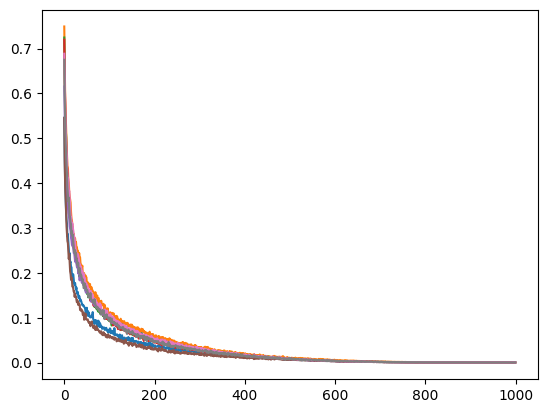

In [24]:
for i in range(1):
    for j in range(8):
        plt.plot(lds_loss_array[i, :, j], color="C{}".format(j))
    # break

In [25]:
mask_array_list = []

for i in my_list:
    # print(i)
    with open('../../data/indices/5000-0.5/lds-val/sub-idx-{}.pkl'.format(i), 'rb')  as handle:
        sub_idx_train = pickle.load(handle)
    # print(len(sub_idx_train))
    mask_array = np.in1d(idx_train, sub_idx_train)
        
    mask_array_list.append(mask_array)
    
lds_mask_array = np.stack(mask_array_list)
lds_mask_array.shape

(64, 5000)

In [26]:
lds_testset_correctness = lds_loss_array.mean(axis=1)
lds_testset_correctness.shape

(64, 1000)

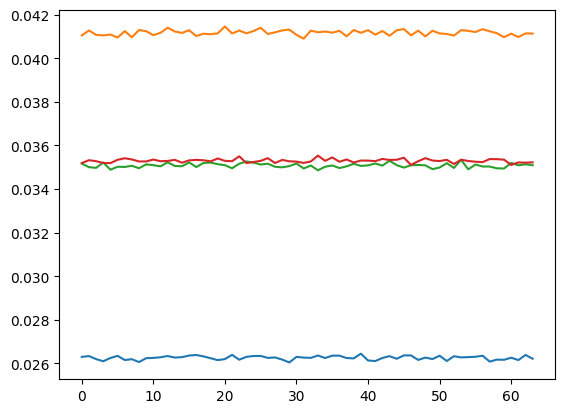

In [27]:
for j in range(4):
    plt.plot(lds_testset_correctness[:, j], color="C{}".format(j))
    # break
# plt.ylim(0.15, 0.2)

In [28]:
loss_array_list = []

for i in range(512):
    for seed in [
        0,
                 # 1,
                 # 2,
                 # 3,
                 # 4,
                ]:
        for e_seed in [
            0, 
                       1, 
                       2
                      ]:
            with open('../../saved/5000-0.5/retrain/ddpm-sub-{}-{}/e-{}-gen.pkl'.format(i, seed, e_seed), 'rb')  as handle:
                loss_list = pickle.load(handle)
            margins = np.concatenate(loss_list, axis=-1) # -logp
            ####
            if (seed==0) and (e_seed)==0:
                loss_array = margins
            else:
                loss_array += margins
            
    loss_array = loss_array/(3)
    
    loss_array_list.append(loss_array)
retrain_loss_array = np.stack(loss_array_list)
retrain_loss_array.shape

(512, 1000, 1000)

In [29]:
mask_array_list = []

for i in range(512):
    # print(i)
    with open('../../data/indices/5000-0.5/retrain/sub-idx-{}.pkl'.format(i), 'rb')  as handle:
        sub_idx_train = pickle.load(handle)
    # print(len(sub_idx_train))
    mask_array = np.in1d(idx_train, sub_idx_train)
        
    mask_array_list.append(mask_array)
    
retrain_mask_array = np.stack(mask_array_list)
retrain_mask_array.shape

(512, 5000)

In [30]:
retrain_testset_correctness = retrain_loss_array.mean(axis=1)
retrain_testset_correctness.shape

(512, 1000)

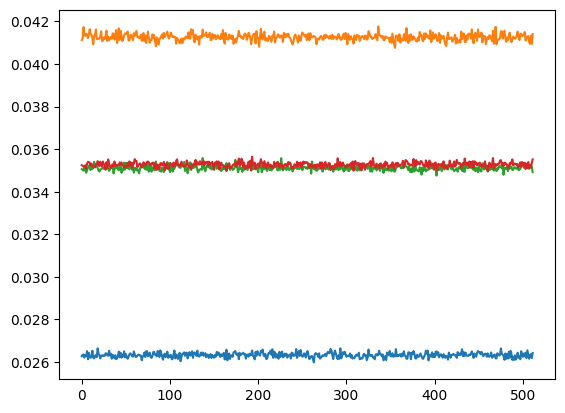

In [31]:
for j in range(4):
    plt.plot(retrain_testset_correctness[:, j], color="C{}".format(j))
    # break
# plt.ylim(0.15, 0.2)

In [32]:
# compute emp inf
def _masked_dot(x, mask, esp=1e-10):
    x = x.T
    return (np.matmul(x, mask) / np.maximum(np.sum(mask, axis=0, keepdims=True), esp))

In [33]:
scores = _masked_dot(retrain_testset_correctness, retrain_mask_array) - _masked_dot(retrain_testset_correctness, ~retrain_mask_array)
scores.shape

(1000, 5000)

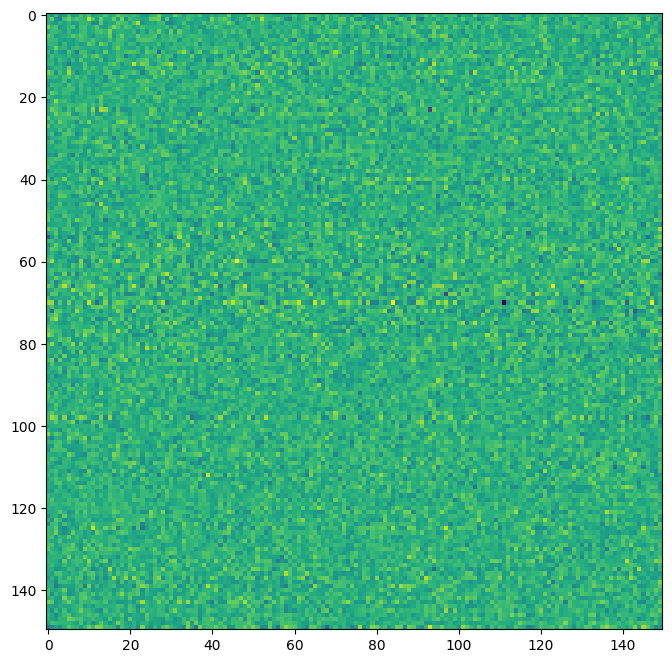

In [34]:
plt.figure(figsize = (8, 8))
plt.imshow(scores[0:150, 0:150], 
           # cmap='coolwarm',
          )

In [35]:
i = 7
D = scores[i]
D.shape

(5000,)

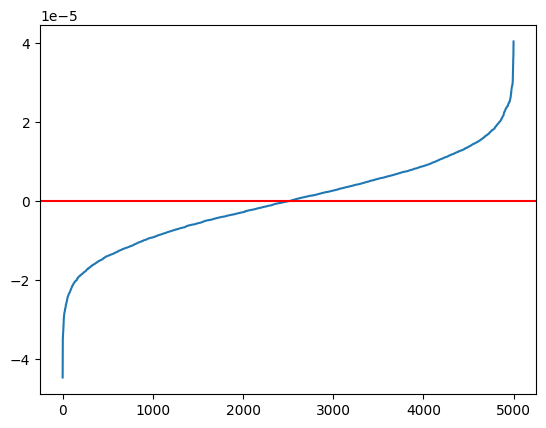

In [36]:
plt.plot(sorted(D))
plt.axhline(y=0, c='red')

In [37]:
topK = np.arange(10000)[D.argsort()[0:5]]
topK

array([3585, 1208,  515, 1238,  479])

In [38]:
plot_images = []
plot_images.append(val_dataset[i]['img'])
for idx in topK:
    plot_images.append(train_dataset[int(idx)]['img'])

In [39]:
val_artist = ''
val_artist

''

In [40]:
train_artist = []
for i in topK:
    tmp_artist = ''
    train_artist.append(tmp_artist)
train_artist   

['', '', '', '', '']

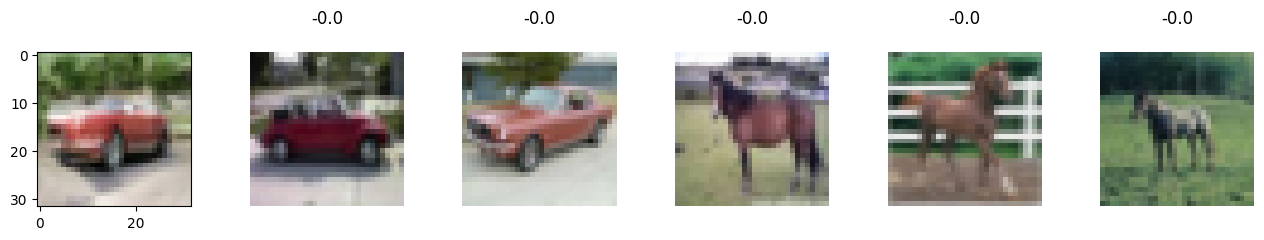

In [41]:
show_images(plot_images, D[D.argsort()[0:5]], val_artist, train_artist)

In [58]:
emp_scores_list = []

In [59]:
scores = _masked_dot(retrain_testset_correctness[0:64], retrain_mask_array[0:64]) - _masked_dot(retrain_testset_correctness[0:64], 
                                                                                                ~retrain_mask_array[0:64])
emp_scores_list.append(scores)
scores.shape

(1000, 5000)

In [60]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = scores
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in range(1000):
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean()} (avg p value {ps.mean():.6f})')
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')
print(f'Correlation: {rs.mean():.4f} (avg p value {ps.mean():.6f})')
print(f'Correlation: {rs.mean():.5f} (avg p value {ps.mean():.6f})')

Correlation: 0.04185182070218482 (avg p value 0.467318)
Correlation: 0.042 (avg p value 0.467318)
Correlation: 0.0419 (avg p value 0.467318)
Correlation: 0.04185 (avg p value 0.467318)


In [61]:
scores = _masked_dot(retrain_testset_correctness[0:128], retrain_mask_array[0:128]) - _masked_dot(retrain_testset_correctness[0:128], 
                                                                                                ~retrain_mask_array[0:128])
emp_scores_list.append(scores)

scores.shape

(1000, 5000)

In [62]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = scores
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in range(1000):
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)

print(f'Correlation: {rs.mean()} (avg p value {ps.mean():.6f})')
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')
print(f'Correlation: {rs.mean():.4f} (avg p value {ps.mean():.6f})')
print(f'Correlation: {rs.mean():.5f} (avg p value {ps.mean():.6f})')

Correlation: 0.06209349192934 (avg p value 0.452942)
Correlation: 0.062 (avg p value 0.452942)
Correlation: 0.0621 (avg p value 0.452942)
Correlation: 0.06209 (avg p value 0.452942)


In [63]:
# scores = _masked_dot(retrain_testset_correctness[0:192], retrain_mask_array[0:192]) - _masked_dot(retrain_testset_correctness[0:128], 
#                                                                                                 ~retrain_mask_array[0:128])
# emp_scores_list.append(scores)

# scores.shape

In [64]:
# # compute lds
# from scipy.stats import spearmanr, pearsonr
# ####
# margins = lds_testset_correctness
# infl_est_ = scores
# # infl_est_ = -tmp
# preds = lds_mask_array @ infl_est_.T
# ####
# rs = []
# ps = []

# for ind in range(1000):
#     r, p = spearmanr(preds[:, ind], margins[:, ind])
#     # r, p = pearsonr(preds[:, ind], margins[:, ind])
#     rs.append(r)
#     ps.append(p)
    
# rs, ps = np.array(rs), np.array(ps)

# print(f'Correlation: {rs.mean()} (avg p value {ps.mean():.6f})')
# print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')
# print(f'Correlation: {rs.mean():.4f} (avg p value {ps.mean():.6f})')
# print(f'Correlation: {rs.mean():.5f} (avg p value {ps.mean():.6f})')

In [65]:
scores = _masked_dot(retrain_testset_correctness[0:256], retrain_mask_array[0:256]) - _masked_dot(retrain_testset_correctness[0:256], 
                                                                                                ~retrain_mask_array[0:256])
emp_scores_list.append(scores)

scores.shape

(1000, 5000)

In [66]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = scores
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in range(1000):
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)

print(f'Correlation: {rs.mean()} (avg p value {ps.mean():.6f})')
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')
print(f'Correlation: {rs.mean():.4f} (avg p value {ps.mean():.6f})')
print(f'Correlation: {rs.mean():.5f} (avg p value {ps.mean():.6f})')

Correlation: 0.09620233521108998 (avg p value 0.412235)
Correlation: 0.096 (avg p value 0.412235)
Correlation: 0.0962 (avg p value 0.412235)
Correlation: 0.09620 (avg p value 0.412235)


In [67]:
scores = _masked_dot(retrain_testset_correctness[0:512], retrain_mask_array[0:512]) - _masked_dot(retrain_testset_correctness[0:512], 
                                                                                                ~retrain_mask_array[0:512])
emp_scores_list.append(scores)

scores.shape

(1000, 5000)

In [68]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = scores
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in range(1000):
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)

print(f'Correlation: {rs.mean()} (avg p value {ps.mean():.6f})')
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')
print(f'Correlation: {rs.mean():.4f} (avg p value {ps.mean():.6f})')
print(f'Correlation: {rs.mean():.5f} (avg p value {ps.mean():.6f})')

Correlation: 0.13214027171354928 (avg p value 0.349313)
Correlation: 0.132 (avg p value 0.349313)
Correlation: 0.1321 (avg p value 0.349313)
Correlation: 0.13214 (avg p value 0.349313)


In [69]:
my_data = {
    'margins': margins[:, 0],
    'preds': preds[:, 0]
}

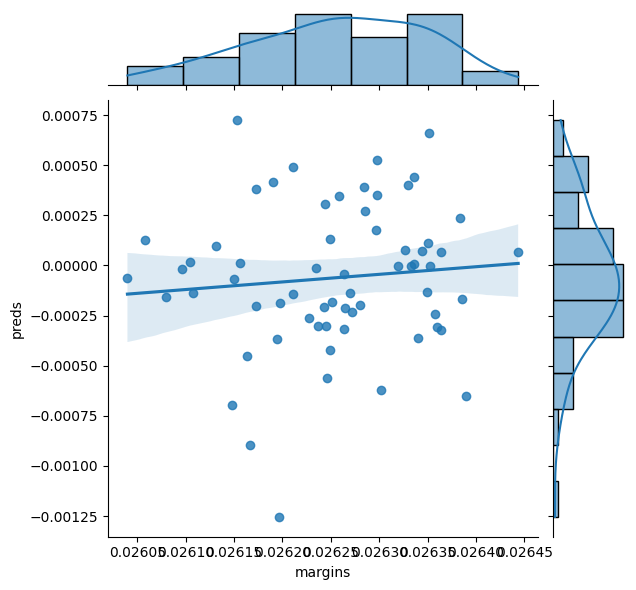

In [70]:
import seaborn as sns
sns.jointplot(data=my_data, x="margins", y="preds", kind="reg")

In [71]:
len(emp_scores_list)

4

In [74]:
with open('./gen_emp.pkl', 'wb') as handle:
    pickle.dump(emp_scores_list, handle)